# The Spark Foundation

# Graduate Rotational Internship Program(GRIP) September 2021

# Data Science & Business Analytics

# Author- Shubham Namdeo

# Task-5 Exploratory Data Analysis - SPORTS (level-Advanced)

###### As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. Suggest teams or players a company should endorse for its products

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the Data
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
#column names
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
#now some basic information
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [10]:
print('Total No. of Seasons:',matches['season'].nunique())

Total No. of Seasons: 12


In [11]:
print('Seasons:\n',matches['season'].unique())

Seasons:
 [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]


In [12]:
print('Total No. of Cities:',matches['city'].nunique())

Total No. of Cities: 32


In [13]:
print('City Names:\n',matches['city'].unique())

City Names:
 ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


In [14]:
print('Total No. of Teams:',matches['team1'].nunique())

Total No. of Teams: 15


In [15]:
print('Teams:\n',matches['team1'].unique())

Teams:
 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [16]:
print('Total No. of Venue:',matches['venue'].nunique())

Total No. of Venue: 41


In [17]:
print('Venue:\n',matches['venue'].unique())

Venue:
 ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Du

In [18]:
print('No of players who won man of the match:',matches['player_of_match'].nunique())

No of players who won man of the match: 226


In [19]:
print('No of man of the matches won by players-\n')
matches['player_of_match'].value_counts()

No of man of the matches won by players-



CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
J Archer           1
TM Dilshan         1
A Singh            1
P Shaw             1
R McLaren          1
Name: player_of_match, Length: 226, dtype: int64

In [20]:
#checking for null values
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [21]:
#Printing rows having nan values
matches[matches.isnull().any(axis=1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [22]:
#Details about Umpires
u1=set(matches['umpire1'])
u2=set(matches['umpire2'])
u3=set(matches['umpire3'])

ump=u1.intersection(u2)
ump=ump.intersection(u3)

#Removing null values from set
ump.discard(np.nan)

#No of umpires in IPL
print("No. of Umpires",len(ump))
print("Umpire Names-\n",ump)

No. of Umpires 19
Umpire Names-
 {'Rod Tucker', 'Vineet Kulkarni', 'Kumar Dharmasena', 'Anil Chaudhary', 'KN Ananthapadmanabhan', 'Yeshwant Barde', 'Ulhas Gandhe', 'Nitin Menon', 'O Nandan', 'Nigel Llong', 'C Shamshuddin', 'Ian Gould', 'A Nanda Kishore', 'Chris Gaffaney', 'S Ravi', 'Nanda Kishore', 'Bruce Oxenford', 'Anil Dandekar', 'K Ananthapadmanabhan'}


In [23]:
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [24]:
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [25]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

<Figure size 1080x864 with 0 Axes>

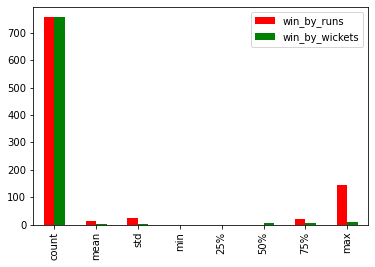

In [26]:
#Analyzing wins of teams using describe function
matches[['win_by_runs', 'win_by_wickets']].describe()

plt.figure(figsize=(15,12))
matches[['win_by_runs', 'win_by_wickets']].describe().plot(kind = 'bar',color=['red','green'])
plt.show()

In [27]:
#team who won by maximum runs
matches[matches['win_by_runs'] == 146][['season','team1', 'team2','winner','win_by_runs','player_of_match']]

,season,team1,team2,winner,win_by_runs,player_of_match
43,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146,LMP Simmons


######  mumbai indians won by maximum runs

In [28]:
# lets check the Teams who win the Match by all the 10 Wickets
matches[matches['win_by_wickets']==10][['season','team1', 'team2','winner','win_by_wickets','player_of_match']]

,season,team1,team2,winner,win_by_wickets,player_of_match
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10,CA Lynn
34,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,10,Sandeep Sharma
71,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,10,AC Gilchrist
119,2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,10,DL Vettori
183,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,10,JH Kallis
298,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,10,SR Watson
376,2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians,10,DR Smith
390,2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,10,MEK Hussey
542,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,10,VR Aaron
590,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,10,B Kumar


In [29]:
#No of Teams who won by 10 wickets
len(matches[matches['win_by_wickets']==10][['season','team1', 'team2','winner','win_by_wickets','player_of_match']])

11

In [30]:
#Tie and no result matches
matches[(matches['result']=='tie')|(matches['result']=='no result')][['date','team1','team2', 'result', 'winner']]

,date,team1,team2,result,winner
33,2017-04-29,Gujarat Lions,Mumbai Indians,tie,Mumbai Indians
125,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,tie,Rajasthan Royals
189,2010-03-21,Kings XI Punjab,Chennai Super Kings,tie,Kings XI Punjab
300,2011-05-21,Delhi Daredevils,Pune Warriors,no result,NaN
387,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,tie,Sunrisers Hyderabad
400,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,tie,Royal Challengers Bangalore
475,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,tie,Rajasthan Royals
535,2015-04-21,Rajasthan Royals,Kings XI Punjab,tie,Kings XI Punjab
545,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,no result,NaN
570,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,no result,NaN


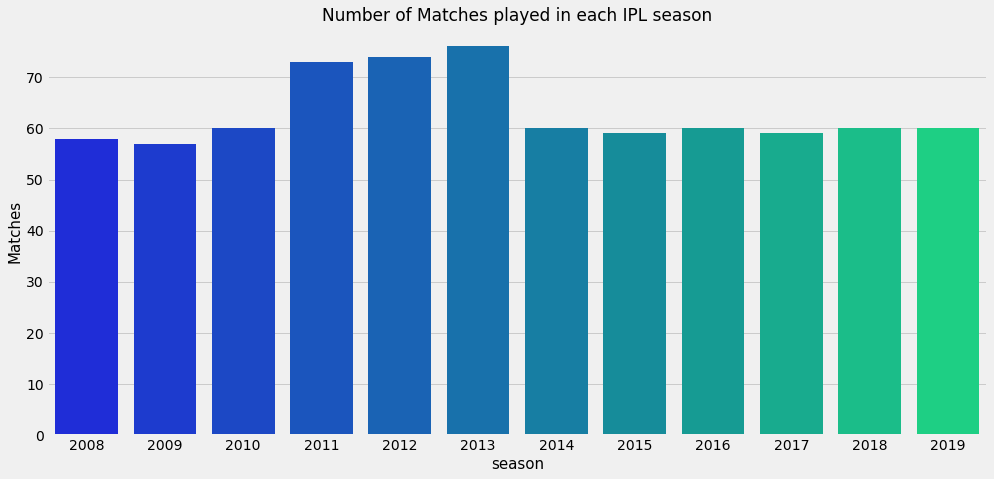

In [44]:
# lets check the Number matches in each Season
sns.countplot('season',data=matches,palette="winter")
plt.title("Number of Matches played in each IPL season",fontsize=17)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

######  In 2013 season maximun matches played.

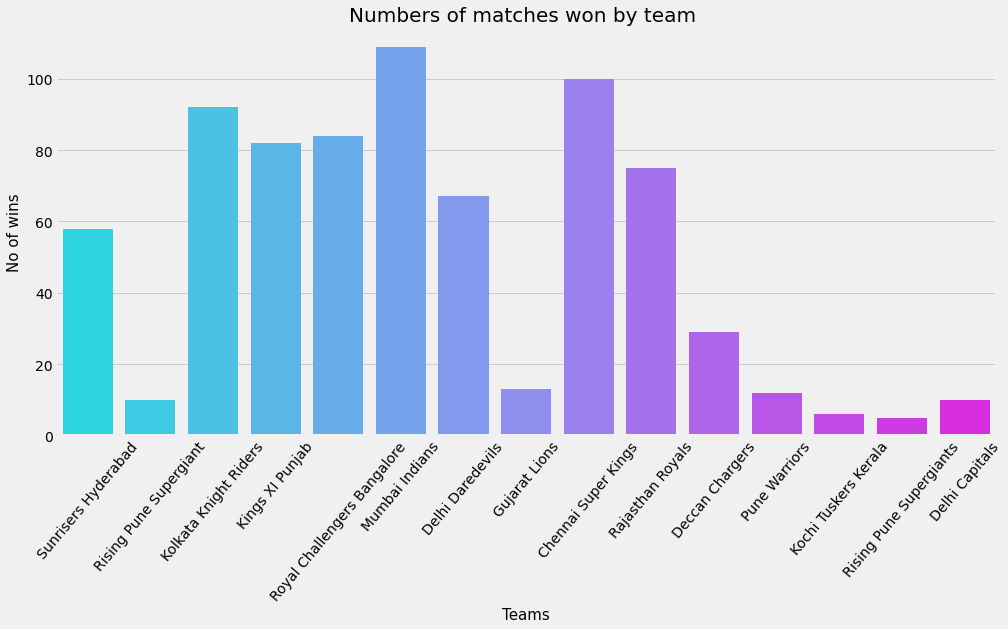

In [45]:
#lets check number of matches won by team
sns.countplot(x='winner',data=matches, palette='cool')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

######  Mumbai Indians won maximum number of matches

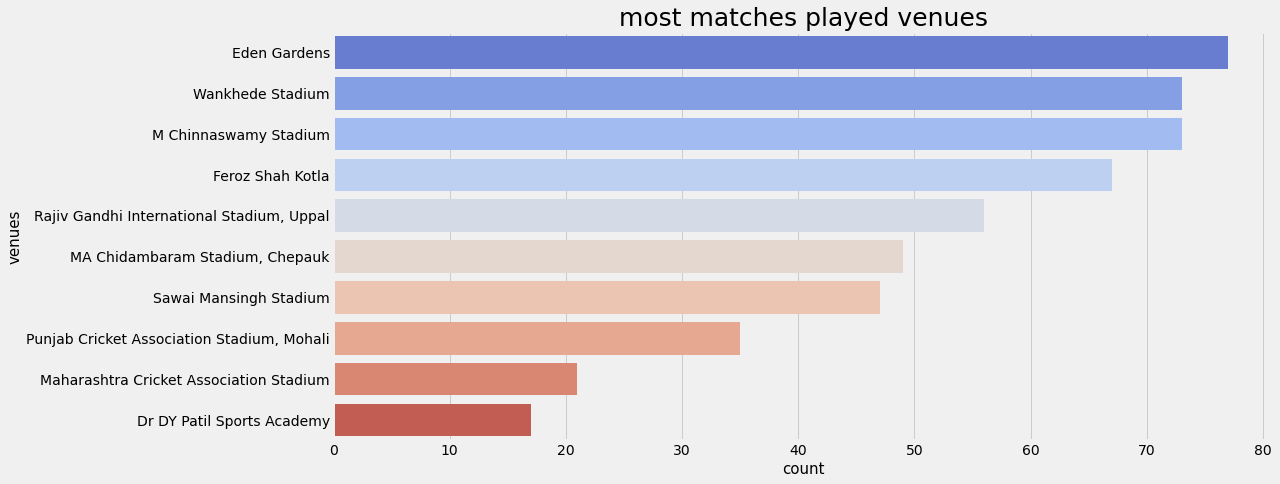

In [51]:
#Most matches played venues
sns.barplot(y=matches['venue'].value_counts().head(10).index, x=matches['venue'].value_counts().head(10).values, palette = 'coolwarm')
plt.title('most matches played venues', fontsize=25)
plt.xlabel('count', fontsize=15)
plt.ylabel('venues',fontsize=15)
plt.show()

######  Eden Garden is the venue where most matches are played.

<AxesSubplot:xlabel='city'>

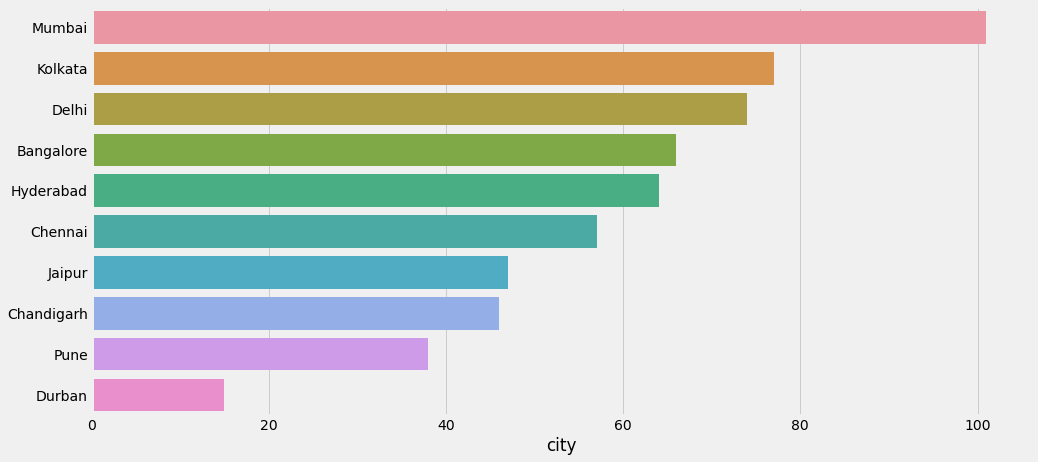

In [34]:
#Top 10 cities where maximum no of matches has been played
top10cities=matches["city"].value_counts()[:10]
sns.barplot(top10cities,top10cities.index)

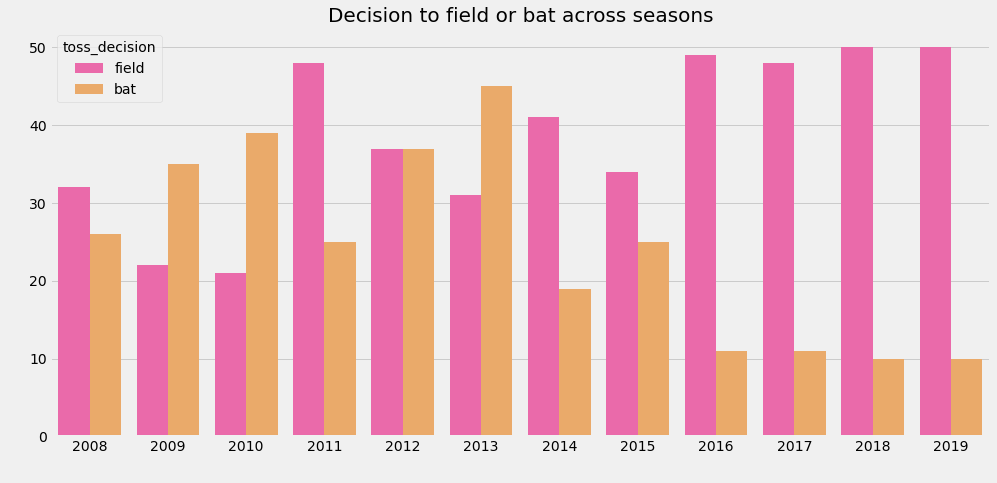

In [46]:
# lets compare the Toss Decisions

sns.countplot(matches['season'].sort_values(), hue = matches['toss_decision'], palette = 'spring')
plt.title("Decision to field or bat across seasons", fontsize = 20)
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

In [53]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')

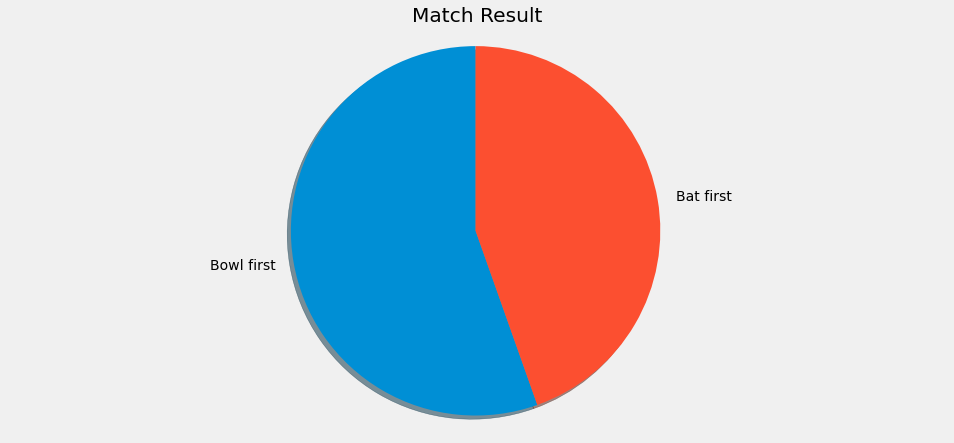

In [61]:
Win=matches.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
plt.pie(sizes, labels=labels, shadow=True,startangle=90)
plt.title('Match Result')
plt.axis('equal')
plt.show()

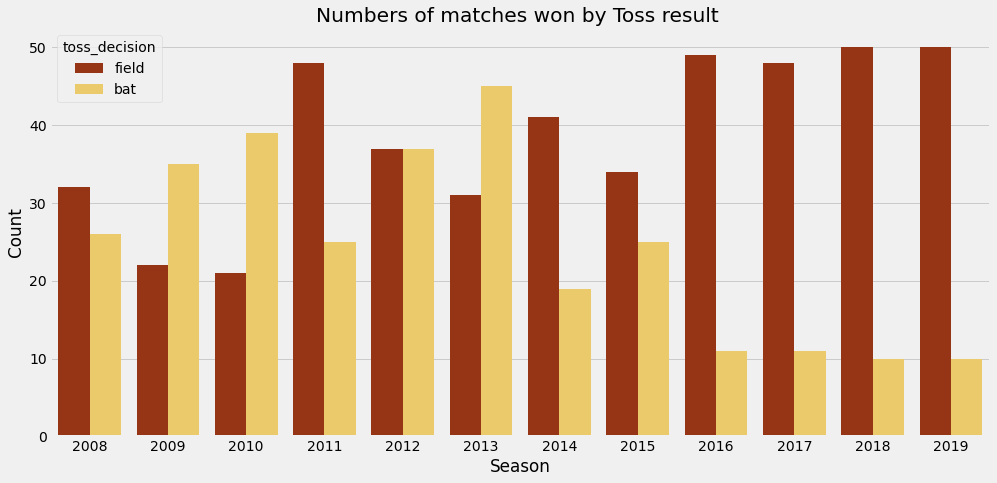

In [67]:
# we will plot graph on Numbers of matches won by Toss result
sns.countplot('season',hue='toss_decision',data=matches,palette='afmhot')
plt.title("Numbers of matches won by Toss result ")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

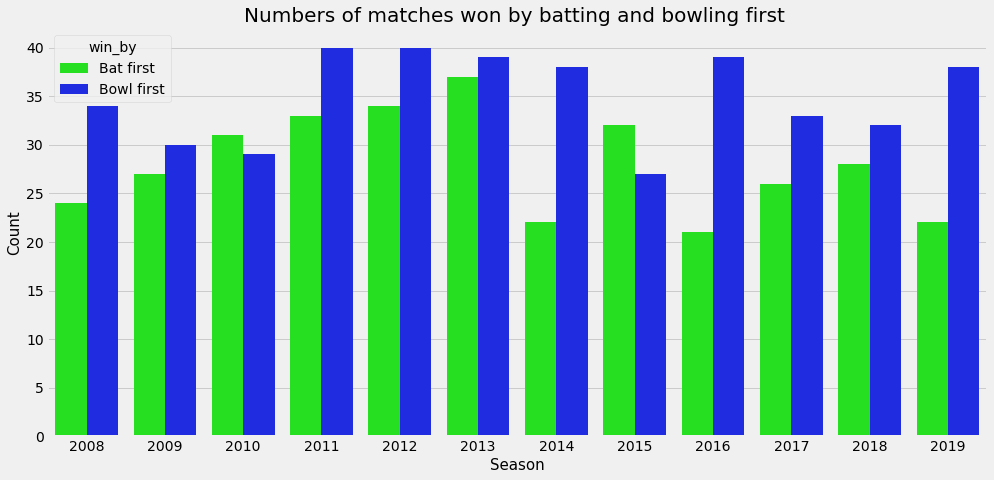

In [62]:
#lets check number of matches won by batting and bowling first

sns.countplot('season',hue='win_by',data=matches,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [69]:
# we will print winner season wise
final_matches=matches.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


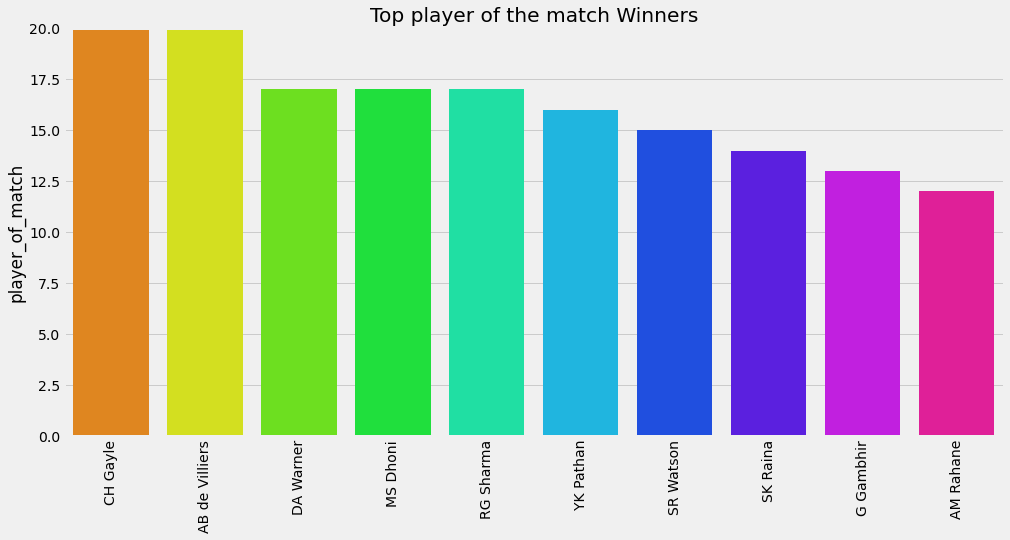

In [74]:
# we will print name of top player in IPL
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

In [76]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

In [77]:
# we will print man of the match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [82]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [83]:
# we will print numbers of fours hit by team
four_data=deliveries[deliveries['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


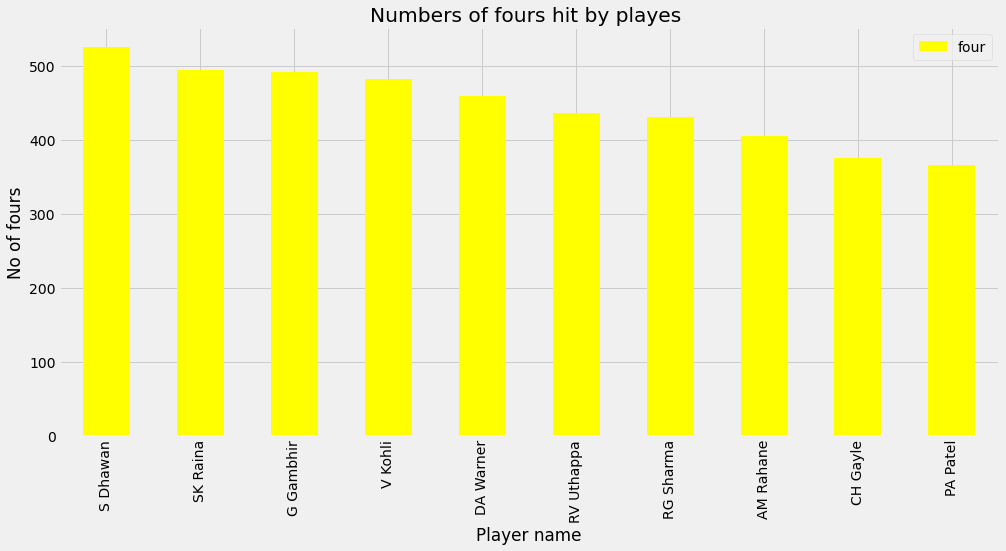

In [87]:
# we will plot graph on four hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='yellow')
plt.title("Numbers of fours hit by playes ")
plt.xlabel("Player name")
plt.ylabel("No of fours")
plt.show()

In [88]:
# we will print no of sixes hit by team
six_data=deliveries[deliveries['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


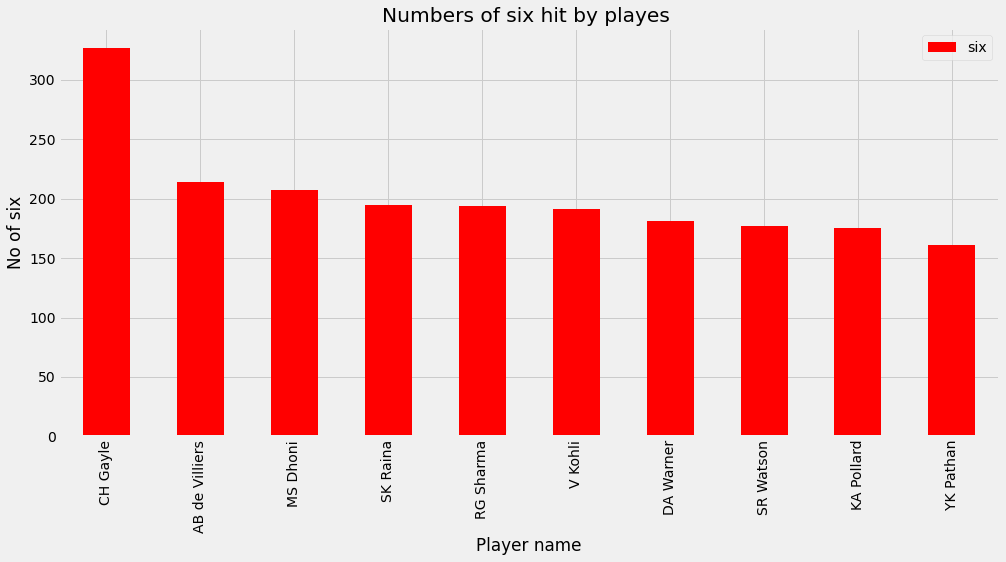

In [90]:
# we will plot graph of six hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='red')
plt.title("Numbers of six hit by playes ")
plt.xlabel("Player name")
plt.ylabel("No of six")
plt.show()

In [96]:
wicket_data=deliveries.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [97]:
# we will print ipl most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


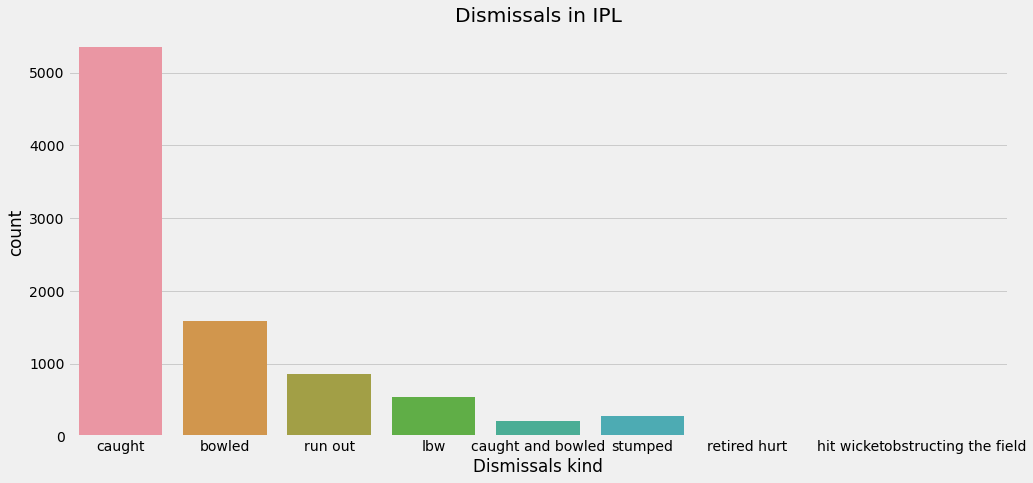

In [105]:
# Dismissals in IPL

ax=sns.countplot(deliveries.dismissal_kind)
plt.title("Dismissals in IPL")
plt.xlabel("Dismissals kind")
plt.ylabel("count")
plt.show()

###  Thank You
